In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
oil_df = pd.read_csv("oil.csv")
holidays_df = pd.read_csv("holidays_events.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
transactions_df = pd.read_csv("transactions.csv")

In [3]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [4]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [5]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [9]:
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [10]:
train_df.duplicated().sum()

0

In [11]:
round(train_df.describe(), 2)

,id,store_nbr,sales,onpromotion
count,3000888.00,3000888.00,3000888.00,3000888.00
mean,1500443.50,27.50,357.78,34.60
std,866281.89,15.59,1102.00,99.48
min,0.00,1.00,0.00,0.00
25%,750221.75,14.00,0.00,0.00
50%,1500443.50,27.50,11.00,1.00
75%,2250665.25,41.00,195.85,16.00
max,3000887.00,54.00,124717.00,1006.00


In [12]:
train_df.id.nunique()

3000888

In [13]:
round(train_df.sales.describe(), 2)

count    3000888.00
mean         357.78
std         1102.00
min            0.00
25%            0.00
50%           11.00
75%          195.85
max       124717.00
Name: sales, dtype: float64

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 137.4+ MB


In [15]:
train_df['date'] = pd.to_datetime(train_df['date'],  errors='coerce')

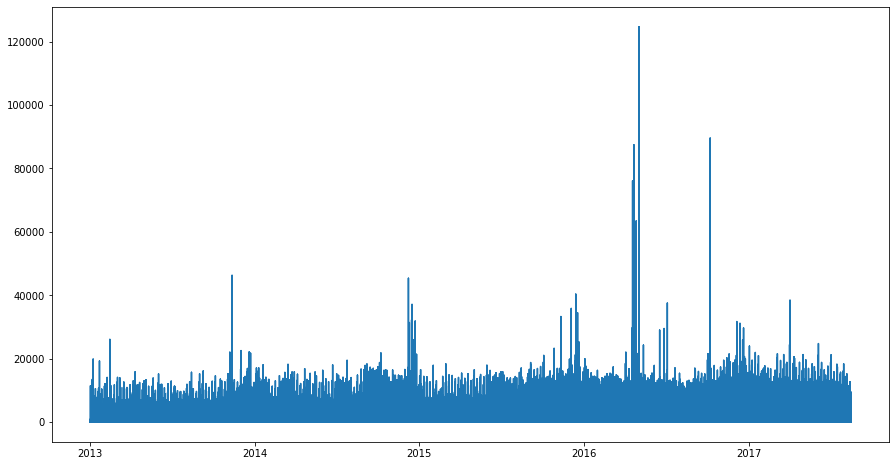

In [16]:
plt.figure(figsize=(15,8))
plt.plot(train_df.date, train_df.sales)
plt.show()

In [17]:
months_sales = train_df.groupby(train_df['date'].dt.strftime('%B'))['sales'].sum().sort_values()

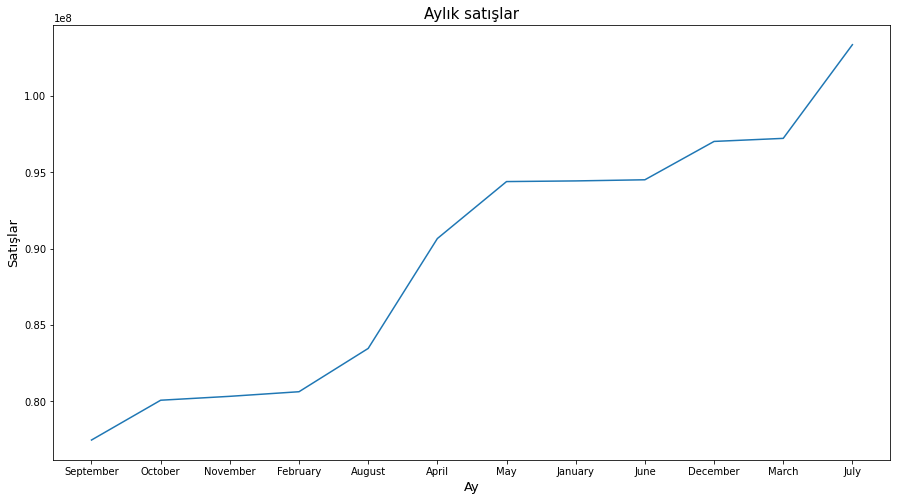

In [18]:
plt.figure(figsize=(15,8))
plt.plot(months_sales)
plt.title("Aylık satışlar", fontsize=15)
plt.xlabel("Ay", fontsize=13)
plt.ylabel("Satışlar", fontsize=13)
plt.show()

In [19]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0


In [20]:
months_pormotions = train_df.groupby(train_df['date'].dt.strftime('%B'))['onpromotion'].sum().sort_values()

In [21]:
stores_sales = train_df.groupby('store_nbr')['sales'].sum()

In [22]:
stores_sales.sort_values(inplace=True)

In [23]:
round(stores_sales, 2)

store_nbr
52     2696169.73
22     4090201.74
32     5951796.00
30     7382073.66
35     7676679.42
26     7755121.89
42     8945767.89
21     9255505.91
10     9613905.74
29     9725157.70
13    10523045.82
12    10659217.96
16    10986412.55
54    11057483.12
53    11216167.28
14    11387918.75
25    11420997.87
15    11451270.02
23    11651380.67
20    12920954.59
19    13049509.84
18    13259375.69
1     14145012.87
33    14178501.29
41    14991039.14
36    15322431.10
5     15592404.57
43    16391692.21
34    17090734.16
31    17746872.70
17    18030969.25
28    18383154.83
40    18395757.41
38    18859999.26
4     18909700.38
27    19188021.38
37    19970635.61
39    20252192.53
2     21557388.64
24    23767732.70
6     25183680.00
9     26409441.06
7     26952049.58
11    28325558.48
50    28653020.62
8     30494286.93
51    32911489.54
48    35933130.27
46    41896062.12
49    43420095.78
3     50481910.19
47    50948310.06
45    54498010.42
44    62087553.25
Name: sales, dtype

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
train_df.family = le.fit_transform(train_df.family)

In [26]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,0,0.0,0.0
1,1,2013-01-01,1,1,0.0,0.0


In [27]:
X = train_df.drop(['sales', 'id', 'date'], axis = 1).values
y = train_df.sales.values

In [28]:
X.shape

(3000888, 3)

In [29]:
y.shape

(3000888,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
regressorlineer = LinearRegression()

In [33]:
regressorlineer.fit(X_train, y_train)

LinearRegression()

In [34]:
regressorlineer.score(X_train, y_train)

0.5733056877980529

In [35]:
regressorlineer.score(X_test, y_test)

0.5683808692834986

In [36]:
test_df.head(20)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0
5,3000893,2017-08-16,1,BREAD/BAKERY,131.0
6,3000894,2017-08-16,1,CELEBRATION,29.0
7,3000895,2017-08-16,1,CLEANING,438.0
8,3000896,2017-08-16,1,DAIRY,226.0
9,3000897,2017-08-16,1,DELI,90.0


In [37]:
test_df.family = le.fit_transform(test_df.family)

In [38]:
test_df.head(20)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,0,20.0
1,3000889,2017-08-16,1,1,1.0
2,3000890,2017-08-16,1,2,8.0
3,3000891,2017-08-16,1,3,560.0
4,3000892,2017-08-16,1,4,1.0
5,3000893,2017-08-16,1,5,131.0
6,3000894,2017-08-16,1,6,29.0
7,3000895,2017-08-16,1,7,438.0
8,3000896,2017-08-16,1,8,226.0
9,3000897,2017-08-16,1,9,90.0


In [39]:
X = test_df.drop(["id", "date"], axis=1).values
X.shape

(28512, 3)

In [40]:
X[0]


array([ 1.,  0., 20.])

In [41]:
predictions = regressorlineer.predict(X)

In [42]:
test_df['sales'] = predictions

In [43]:
test_df.head(28512)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,0,20.0,166.269744
1,3000889,2017-08-16,1,1,1.0,7.088722
2,3000890,2017-08-16,1,2,8.0,65.389321
3,3000891,2017-08-16,1,3,560.0,4682.439289
4,3000892,2017-08-16,1,4,1.0,6.332288
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,28,54.0,465.756663
28508,3029396,2017-08-31,9,29,10.0,97.458698
28509,3029397,2017-08-31,9,30,302.0,2539.692453
28510,3029398,2017-08-31,9,31,15.0,138.777797


In [44]:
test_df.to_csv('LineerRegressionSubmission.csv', index=False)
print("submission successed")

submission successed
